In [14]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix , roc_curve, auc
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import learning_curve

In [2]:
#load the dataset with extracted features
extracted_features_df = pd.read_csv("extracted_features.csv")

In [3]:
#drop the class column from the dataset to get the input features
features = extracted_features_df.drop("class", axis  =1)

In [4]:
#name the input features as X
X = features[list(features.columns)]

In [5]:
X.shape

(8732, 40)

In [6]:
# class column is the target variable. This is named as Y
Y = extracted_features_df[['class']]
Y.shape #label data consists of 2021119 rows and 1 col 

(8732, 1)

In [7]:
# use label encoder to Encode target labels with value between 0 and n_classes-1
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))

c:\Users\ravis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# Split the data into training and test set. Training set is used for training the model. *0% of the data is used for training the model
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
### No of classes
num_labels=Y.shape[1]

In [10]:
num_labels

10

## 1) Neural Network Model

In [11]:
# #building a Neural Network model
# model=Sequential()
# ###first layer
# model.add(Dense(100,input_shape=(40,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###second layer
# model.add(Dense(200))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###third layer
# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# ###final layer
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))

In [11]:
model = Sequential()

model.add(Dense(128, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5248      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

In [12]:
#compiling the model layers
# model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [13]:
## Trianing the neural network model model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

# We generally chosse number of epochs as number of features * 3 
num_epochs = 120
num_batch_size = 32
# saving the model checkpoint to local folder
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
# earlystopping = callbacks.EarlyStopping(monitor="val_loss",
#                                         mode="min", patience=5,
#                                         restore_best_weights=True)
start = datetime.now()

#Train the model
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/120
210/219 [===========================>..] - ETA: 0s - loss: 10.7295 - accuracy: 0.1314
Epoch 1: val_loss improved from inf to 2.21144, saving model to .\audio_classification.hdf5
219/219 [==============================] - 2s 5ms/step - loss: 10.4390 - accuracy: 0.1316 - val_loss: 2.2114 - val_accuracy: 0.1878
Epoch 2/120
208/219 [===========================>..] - ETA: 0s - loss: 2.4935 - accuracy: 0.1836
Epoch 2: val_loss did not improve from 2.21144
219/219 [==============================] - 1s 4ms/step - loss: 2.4829 - accuracy: 0.1850 - val_loss: 2.2636 - val_accuracy: 0.1294
Epoch 3/120
217/219 [============================>.] - ETA: 0s - loss: 2.2187 - accuracy: 0.2035
Epoch 3: val_loss improved from 2.21144 to 2.18366, saving model to .\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.2184 - accuracy: 0.2034 - val_loss: 2.1837 - val_accuracy: 0.1654
Epoch 4/120
210/219 [===========================>..] - ETA: 0s - loss: 2.1159 -

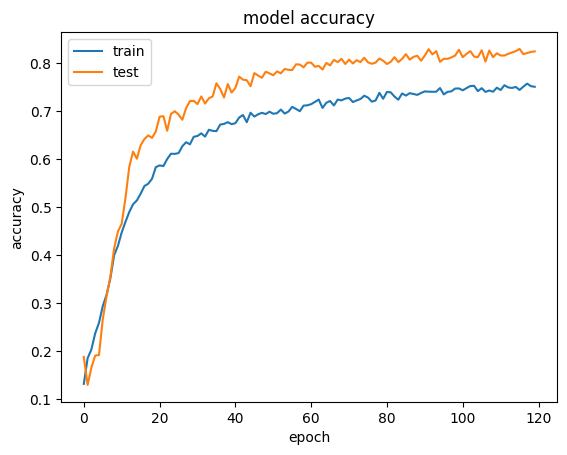

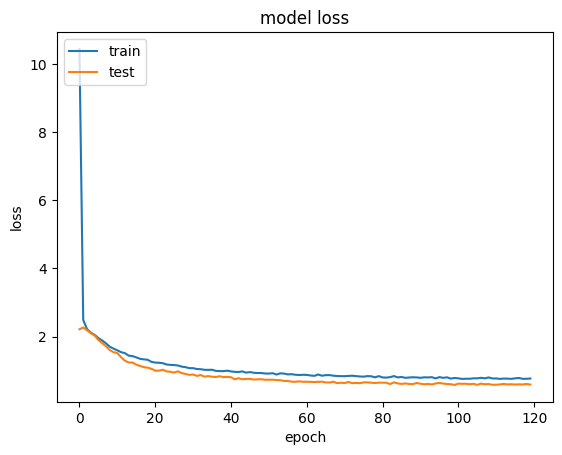

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#confusion matrix
cf_nn = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(model.predict(X_test),axis=1))

55/55 [==============================] - 0s 2ms/step


In [17]:
cf_nn

array([[166,   0,  20,   2,   0,   1,   0,   4,   0,   2],
       [  0,  71,   0,   2,   5,   1,   0,   2,   1,   9],
       [  6,   1, 173,  12,   0,   4,   1,   0,   0,   8],
       [  7,   0,  13, 145,   0,   1,   0,   0,   2,  14],
       [  1,   0,   3,   6, 164,   0,   0,  18,   1,   9],
       [  1,   0,  12,   3,   0, 195,   0,   0,   2,   3],
       [  2,   0,  10,  17,   3,   0,  51,   1,   1,   2],
       [  2,   0,   1,   0,   0,   1,   0, 180,   0,   3],
       [  2,   0,   5,   7,   1,   2,   0,   1, 178,   3],
       [  7,   0,  41,   9,   1,   1,   0,   6,   0, 118]], dtype=int64)

In [18]:
#calculating metrics from the confusion matrix
FP_NN = cf_nn.sum(axis=0) - np.diag(cf_nn) 
FN_NN = cf_nn.sum(axis=1) - np.diag(cf_nn)
TP_NN = np.diag(cf_nn)
TN_NN = cf_nn.sum() - (FP_NN + FN_NN + TP_NN)
FP_NN = FP_NN.astype(float)
FN_NN = FN_NN.astype(float)
TP_NN = TP_NN.astype(float)
TN_NN = TN_NN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR_NN = TP_NN/(TP_NN+FN_NN)
# Specificity or true negative rate
TNR_NN = TN_NN/(TN_NN+FP_NN) 
# Precision or positive predictive value
PPV_NN = TP_NN/(TP_NN+FP_NN)
# Negative predictive value
NPV_NN = TN_NN/(TN_NN+FN_NN)
# Fall out or false positive rate
FPR_NN = FP_NN/(FP_NN+TN_NN)
# False negative rate
FNR_NN = FN_NN/(TP_NN+FN_NN)
# False discovery rate
FDR_NN = FP_NN/(TP_NN+FP_NN)
# Overall accuracy for each class
ACC_NN = (TP_NN+TN_NN)/(TP_NN+FP_NN+FN_NN+TN_NN)

In [19]:
#Sensitivity of the neural network model for all 9 classes
print("Sensitivity for all 9 classes", TPR_NN)

Sensitivity for all 9 classes [0.85128205 0.78021978 0.84390244 0.7967033  0.81188119 0.90277778
 0.5862069  0.96256684 0.89447236 0.64480874]


In [20]:
#Specificity of the neural network model for all 9 classes
print("Specificity for all 9 classes", TNR_NN)

Specificity for all 9 classes [0.98195876 0.99939614 0.93190661 0.9629393  0.99352751 0.99281515
 0.99939759 0.97948718 0.99547804 0.96611253]


In [104]:
#classification report summary
print(classification_report(np.argmax(y_test,axis=1), np.argmax(model.predict(X_test),axis=1)))

#saving the model metrics to a dictionary
report_nn = classification_report(np.argmax(y_test,axis=1), np.argmax(model.predict(X_test),axis=1), output_dict=True)
metrics_nn = {"accuraccy":report_nn["accuracy"]} 
metrics_nn.update(report_nn["weighted avg"])

55/55 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       195
           1       0.99      0.78      0.87        91
           2       0.62      0.84      0.72       205
           3       0.71      0.80      0.75       182
           4       0.94      0.81      0.87       202
           5       0.95      0.90      0.92       216
           6       0.98      0.59      0.73        87
           7       0.85      0.96      0.90       187
           8       0.96      0.89      0.93       199
           9       0.69      0.64      0.67       183

    accuracy                           0.82      1747
   macro avg       0.85      0.81      0.82      1747
weighted avg       0.84      0.82      0.83      1747

55/55 [==============================] - 0s 2ms/step


In [105]:
metrics_nn

{'accuraccy': 0.8248425872925015,
 'precision': 0.8419416300415934,
 'recall': 0.8248425872925015,
 'f1-score': 0.8268651708647826,
 'support': 1747}

55/55 [==============================] - 0s 2ms/step


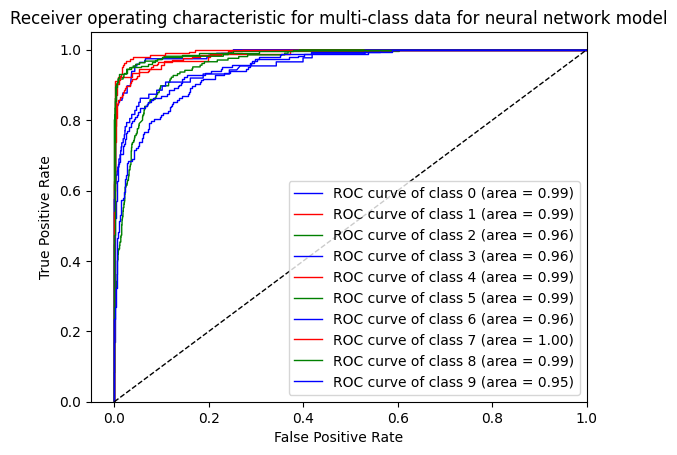

In [45]:
#Plotting ROC curve for Neural Network Model

lw = 1
n_classes = num_labels
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], model.predict(X_test)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data for neural network model')
plt.legend(loc="lower right")
plt.show()

#### The Neural Network model has a validation accuraccy of 82.48%

## 2) Random Forest Model

In [46]:
#import required packages
from sklearn.ensemble import RandomForestClassifier


In [47]:
#training a random forest model
# n_jobs : integer, optional (default=1) The number of jobs to run in parallel for both fit and predict.
# If -1, then the number of jobs is set to the number of cores of the cpu

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)



RandomForestClassifier(n_jobs=-1)

In [48]:
#Random forest model accuraccy
accuracy_score(y_test, rf.predict(X_test))

0.6376645678305667

In [49]:
#confusion matrix
cf_rf = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(rf.predict(X_test),axis=1))

In [50]:
cf_rf

array([[193,   0,   1,   0,   0,   0,   0,   1,   0,   0],
       [ 44,  47,   0,   0,   0,   0,   0,   0,   0,   0],
       [124,   0,  76,   1,   0,   0,   0,   0,   0,   4],
       [ 86,   0,   0,  96,   0,   0,   0,   0,   0,   0],
       [ 57,   0,   0,   0, 141,   0,   0,   4,   0,   0],
       [ 32,   0,   0,   0,   0, 184,   0,   0,   0,   0],
       [ 37,   0,   0,   1,   0,   0,  49,   0,   0,   0],
       [ 30,   0,   0,   0,   3,   0,   0, 153,   0,   1],
       [ 46,   0,   0,   0,   0,   0,   0,   0, 153,   0],
       [124,   0,   1,   1,   0,   0,   0,   1,   0,  56]], dtype=int64)

In [51]:
#calculating metrics from the confusion matrix
FP_RF = cf_rf.sum(axis=0) - np.diag(cf_rf) 
FN_RF = cf_rf.sum(axis=1) - np.diag(cf_rf)
TP_RF = np.diag(cf_rf)
TN_RF = cf_rf.sum() - (FP_RF + FN_RF + TP_RF)
FP_RF = FP_RF.astype(float)
FN_RF = FN_RF.astype(float)
TP_RF = TP_RF.astype(float)
TN_RF = TN_RF.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR_RF = TP_RF/(TP_RF+FN_RF)
# Specificity or true negative rate
TNR_RF = TN_RF/(TN_RF+FP_RF) 
# Precision or positive predictive value
PPV_RF = TP_RF/(TP_RF+FP_RF)
# Negative predictive value
NPV_RF = TN_RF/(TN_RF+FN_RF)
# Fall out or false positive rate
FPR_RF = FP_RF/(FP_RF+TN_RF)
# False negative rate
FNR_RF = FN_RF/(TP_RF+FN_RF)
# False discovery rate
FDR_RF = FP_RF/(TP_RF+FP_RF)
# Overall accuracy for each class
ACC_RF = (TP_RF+TN_RF)/(TP_RF+FP_RF+FN_RF+TN_RF)

In [52]:
#Sensitivity of the random forest model for all 9 classes
print("Sensitivity for all 9 classes", TPR_RF)

Sensitivity for all 9 classes [0.98974359 0.51648352 0.37073171 0.52747253 0.6980198  0.85185185
 0.56321839 0.81818182 0.76884422 0.30601093]


In [53]:
#Specificity of the random forest model for all 9 classes
print("Specificity for all 9 classes", TNR_RF)

Specificity for all 9 classes [0.62628866 1.         0.99870298 0.99808307 0.99805825 1.
 1.         0.99615385 1.         0.99680307]


In [106]:
#random forest model classification report
print(classification_report(np.argmax(y_test,axis=1), np.argmax(rf.predict(X_test),axis=1)))
report_rf = classification_report(np.argmax(y_test,axis=1), np.argmax(rf.predict(X_test),axis=1), output_dict=True)
metrics_rf = {"accuraccy":report_rf["accuracy"]} 
metrics_rf.update(report_rf["weighted avg"])

              precision    recall  f1-score   support

           0       0.25      0.99      0.40       195
           1       1.00      0.52      0.68        91
           2       0.97      0.37      0.54       205
           3       0.97      0.53      0.68       182
           4       0.98      0.70      0.82       202
           5       1.00      0.85      0.92       216
           6       1.00      0.56      0.72        87
           7       0.96      0.82      0.88       187
           8       1.00      0.77      0.87       199
           9       0.92      0.31      0.46       183

    accuracy                           0.66      1747
   macro avg       0.91      0.64      0.70      1747
weighted avg       0.90      0.66      0.70      1747



In [107]:
metrics_rf

{'accuraccy': 0.6571265025758443,
 'precision': 0.8950489039180343,
 'recall': 0.6571265025758443,
 'f1-score': 0.6998445829166081,
 'support': 1747}

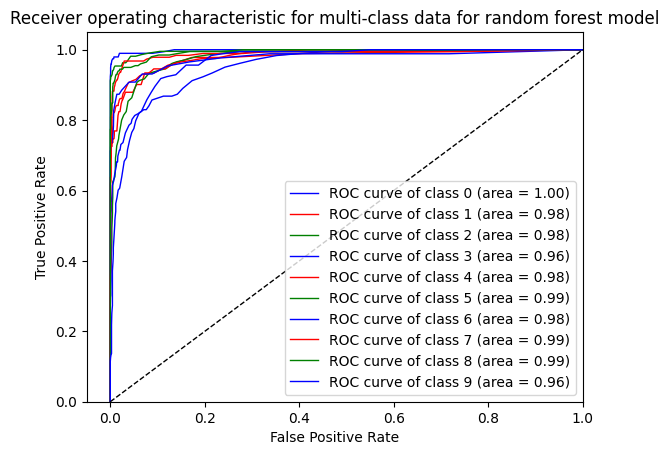

In [55]:
#Random forest model ROC curve for all 9 classes

lw = 1
classifier = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

n_classes = num_labels
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data for random forest model')
plt.legend(loc="lower right")
plt.show()


#### The Random Forest model has a validation accuraccy of 63.76%

## 3) Logistic Regression Model

In [64]:
from sklearn.linear_model import LogisticRegression

In [67]:
#Create a logistic regression Classifier
#We have taken the parameters ‘solver’ as lbfgs because it is good in handling the multinomial loss 
#and ‘multi_class’ as auto which automatically selects between ovr(one-vs-rest) and multinomial

clf = LogisticRegression(solver = 'lbfgs',multi_class='auto',max_iter=10000)

clf.fit(X_train, y_train.argmax(axis=1))

LogisticRegression(max_iter=10000)

In [68]:
#logistic regression model accuraccy
accuracy_score(y_test.argmax(axis=1), clf.predict(X_test))

0.5724098454493417

In [71]:
#confusion matrix
cf_lg = confusion_matrix(y_test.argmax(axis=1), clf.predict(X_test))

In [72]:
cf_lg

array([[ 96,   1,   7,   5,   6,  19,   1,  22,   9,  29],
       [  3,  65,   5,   2,   2,   2,   0,   7,   1,   4],
       [ 26,   0, 110,  16,  16,  12,   0,   2,   2,  21],
       [ 11,   0,  16, 115,   9,  10,   2,   0,   7,  12],
       [  4,   0,  11,   9, 121,  11,   2,  31,   1,  12],
       [ 35,   0,   9,   6,   6, 122,   0,  19,  11,   8],
       [  1,   1,   1,  36,   5,   3,  16,   7,   0,  17],
       [ 10,   0,   0,   0,  18,  11,   0, 133,   1,  14],
       [ 10,   0,  11,   9,   2,  14,   0,   2, 145,   6],
       [ 24,   3,  29,   7,  16,  11,   1,  13,   2,  77]], dtype=int64)

In [73]:
#calculating metrics from the confusion matrix
FP_LG = cf_lg.sum(axis=0) - np.diag(cf_lg) 
FN_LG = cf_lg.sum(axis=1) - np.diag(cf_lg)
TP_LG = np.diag(cf_lg)
TN_LG = cf_lg.sum() - (FP_LG + FN_LG + TP_LG)
FP_LG = FP_LG.astype(float)
FN_LG = FN_LG.astype(float)
TP_LG = TP_LG.astype(float)
TN_LG = TN_LG.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR_LG = TP_LG/(TP_LG+FN_LG)
# Specificity or true negative rate
TNR_LG = TN_LG/(TN_LG+FP_LG) 
# Precision or positive predictive value
PPV_LG = TP_LG/(TP_LG+FP_LG)
# Negative predictive value
NPV_LG = TN_LG/(TN_LG+FN_LG)
# Fall out or false positive rate
FPR_LG = FP_LG/(FP_LG+TN_LG)
# False negative rate
FNR_LG = FN_LG/(TP_LG+FN_LG)
# False discovery rate
FDR_LG = FP_LG/(TP_LG+FP_LG)
# Overall accuracy for each class
ACC_LG = (TP_LG+TN_LG)/(TP_LG+FP_LG+FN_LG+TN_LG)

In [74]:
#Sensitivity of the logistic regression model for all 9 classes
print("Sensitivity for all 9 classes", TPR_LG)

Sensitivity for all 9 classes [0.49230769 0.71428571 0.53658537 0.63186813 0.5990099  0.56481481
 0.18390805 0.71122995 0.72864322 0.42076503]


In [75]:
#Specificity of the logistic regression model for all 9 classes
print("Specificity for all 9 classes", TNR_LG)

Specificity for all 9 classes [0.92010309 0.99698068 0.94228275 0.94249201 0.94822006 0.93925539
 0.99638554 0.93397436 0.97803618 0.9213555 ]


In [108]:
#logistic regression model classification report
print(classification_report(y_test.argmax(axis=1), clf.predict(X_test)))
report_lg = classification_report(y_test.argmax(axis=1), clf.predict(X_test), output_dict=True)
metrics_lg = {"accuraccy":report_lg["accuracy"]} 
metrics_lg.update(report_lg["weighted avg"])


              precision    recall  f1-score   support

           0       0.44      0.49      0.46       195
           1       0.93      0.71      0.81        91
           2       0.55      0.54      0.54       205
           3       0.56      0.63      0.59       182
           4       0.60      0.60      0.60       202
           5       0.57      0.56      0.57       216
           6       0.73      0.18      0.29        87
           7       0.56      0.71      0.63       187
           8       0.81      0.73      0.77       199
           9       0.39      0.42      0.40       183

    accuracy                           0.57      1747
   macro avg       0.61      0.56      0.57      1747
weighted avg       0.59      0.57      0.57      1747



In [109]:
metrics_lg

{'accuraccy': 0.5724098454493417,
 'precision': 0.5892895951361248,
 'recall': 0.5724098454493417,
 'f1-score': 0.570387146701687,
 'support': 1747}

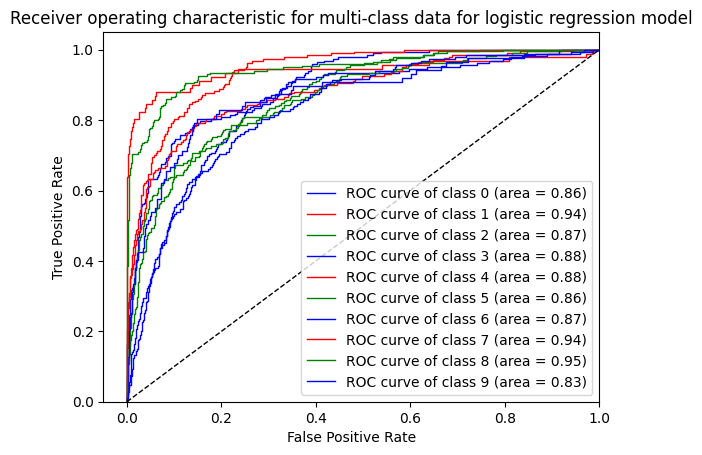

In [79]:
#logistic regression model ROC curve for all 9 classes

lw = 1
classifier = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs',multi_class='auto',max_iter=10000))
y_score = classifier.fit(X_train, y_train.argmax(axis=1)).predict_proba(X_test)

n_classes = num_labels
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data for logistic regression model')
plt.legend(loc="lower right")
plt.show()


#### The Logistic Regression model has a validation accuraccy of 57.24%

## Comparing the model metrics

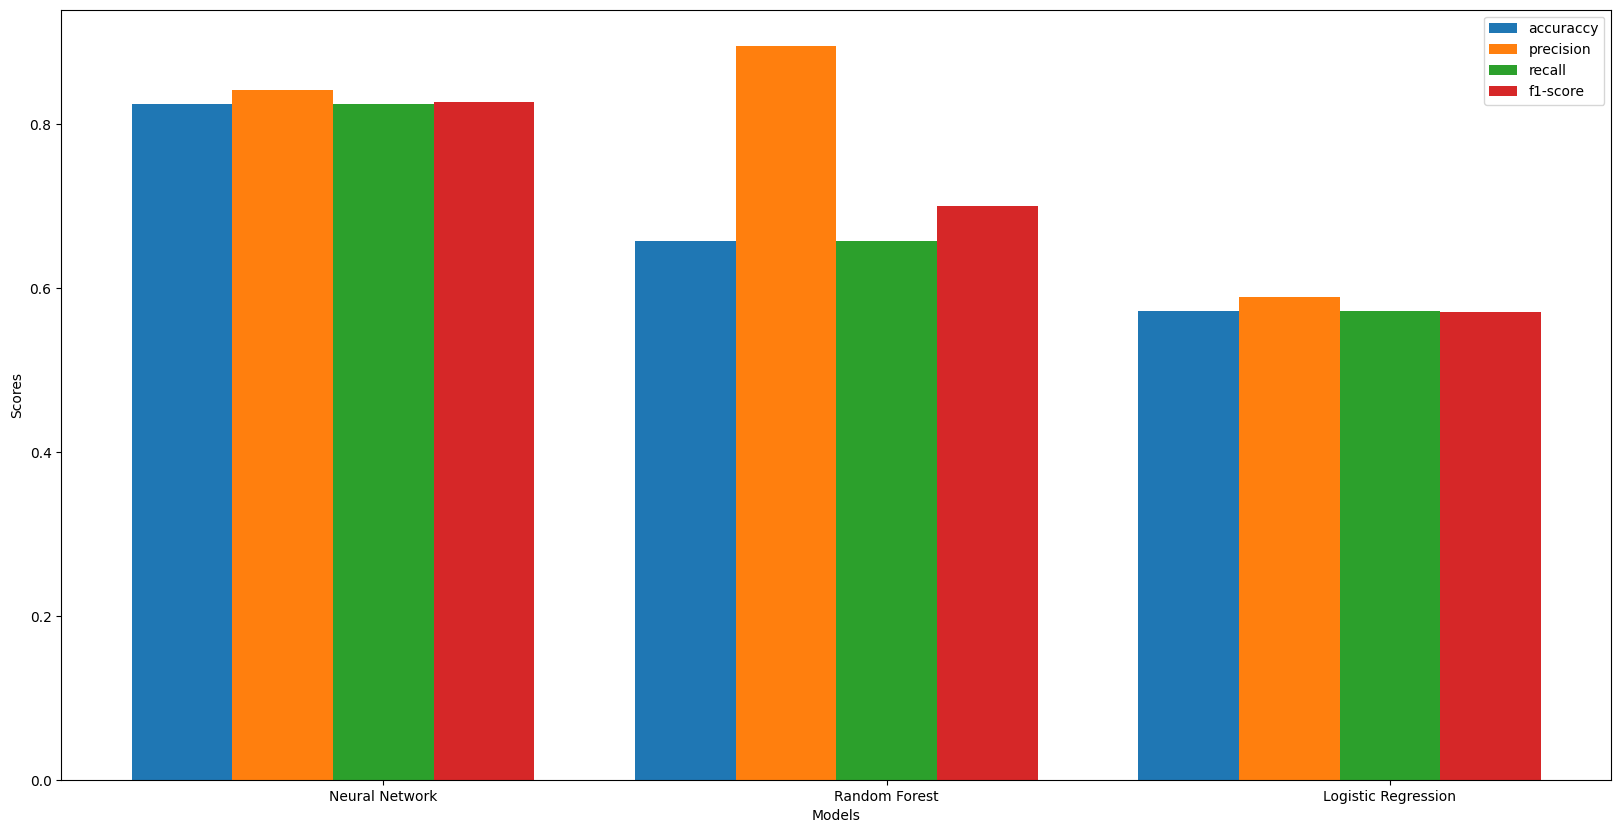

In [118]:
# Plotting a bar chart comparing the model metrics
plt.figure(figsize=(20,10)) 
x = np.arange(3)
y1 = [metrics_nn["accuraccy"], metrics_rf["accuraccy"], metrics_lg["accuraccy"]]
y2 = [metrics_nn["precision"], metrics_rf["precision"], metrics_lg["precision"]]
y3 = [metrics_nn["recall"], metrics_rf["recall"], metrics_lg["recall"]]
y4 = [metrics_nn["f1-score"], metrics_rf["f1-score"], metrics_lg["f1-score"]]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.4, y1, width)
plt.bar(x-0.2, y2, width)
plt.bar(x, y3, width)
plt.bar(x+0.2, y4, width)
plt.xticks(x, ['Neural Network', 'Random Forest', 'Logistic Regression'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["accuraccy", "precision", "recall", "f1-score"])
plt.show()

### We can see that the neural network model has the overall higher and more consistent values of the parameters. hence we chosse the neural network model as our final model for predictions

In [80]:
#saving the label encoder data to local folder for reusing
from pickle import dump
dump(labelencoder, open('encoder.pkl', 'wb'))

In [81]:
#saving the neural network model in h5 format
model.save("neural_network.h5")